## Data 

In [1]:
import pandas as pd

In [2]:
df_reviews = pd.read_csv('IMDB Dataset.csv')

In [ ]:
# taking a sample of 10000 rows to make processing faster and creating imbalanced data, also I dont have much processing power.
# 9000 positives
df_positive = df_reviews[df_reviews['sentiment']== 'positive'][:9000]
# 1000 negatives
df_negative = df_reviews[df_reviews['sentiment']== 'negative'][:1000]

In [4]:
df_reviews_imb = pd.concat([df_positive,df_negative], ignore_index = True) #imb stands for imbalanced 

In [5]:
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

## Dealing with imbalanced data

<Axes: xlabel='sentiment'>

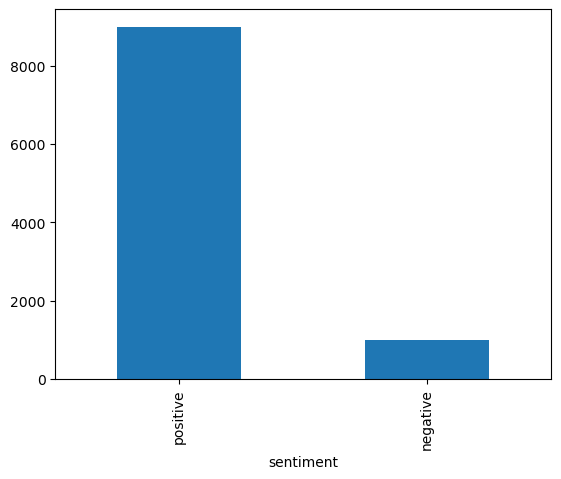

In [6]:
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

### Undersampling
#### Method 1

In [7]:
# negative reviews are the minority, measuring the len to apply in undersampling
length_negative = len(df_reviews_imb[df_reviews_imb['sentiment']=='negative'])

In [8]:
# random sampling to match the len of the minor distribution (negative)
df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment']=='positive'].sample(n=length_negative)

In [9]:
# negative reviews
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment']=='negative']

In [10]:
# joining new negative and positive selection
df_reviews_bal = pd.concat([df_reviews_negative, df_reviews_positive], ignore_index=True) #ball for ballance

In [11]:
df_reviews_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,I have seen the freebird movie and think its g...,positive
1996,"""Holes"" is my all-time favorite movie! So far ...",positive
1997,Heya Denver fans! The animation is a cartoon's...,positive
1998,Im a big horror fan and I quite enjoyed this r...,positive


### Balance data with RandomUnderSampler

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)

In [13]:
# resampling gives back a df and a series, capturing both into one df
df_review_bal, df_review_bal['sentiment'] = rus.fit_resample(df_reviews_imb[['review']]
                                                             ,df_reviews_imb['sentiment'])

In [14]:
df_review_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

### Balance data with RandomOverSampler

In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

In [16]:
df_over_sample, df_over_sample['sentiment'] = ros.fit_resample(df_reviews_imb[['review']],
                df_reviews_imb['sentiment'])

### Training 

In [17]:
# training and testing
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_reviews_bal, test_size=0.33, random_state=42)

In [18]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [19]:
train_y.value_counts()

sentiment
negative    675
positive    665
Name: count, dtype: int64

### Text Representation (Bag of words)

#### Count Vectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])

In [22]:
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values,
                     columns=cv.get_feature_names_out()) # dtf for document term matrix

In [23]:
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


### TfIdf (Term Frequency-Inverse Document Frequency)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])

In [26]:
pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values,
            columns=tfidf.get_feature_names_out())

,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


## Turning text data into numerical vectors

In [27]:
tfidf = TfidfVectorizer(stop_words='english')

In [28]:
train_x_vector = tfidf.fit_transform(train_x)

In [29]:
train_x_vector

<1340x19788 sparse matrix of type '<class 'numpy.float64'>'
	with 112818 stored elements in Compressed Sparse Row format>

In [57]:
tf = tfidf.fit(train_x)


In [58]:
joblib.dump(tf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [30]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                 index=train_x.index,
                                 columns=tfidf.get_feature_names_out())

,00,000,007,01,01pm,02,03,04,05,07,...,zucker,zues,zwart,zzzzzzzzzzzzzzzzzz,æon,élan,état,ísnt,über,ünfaithful
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,0,0,0,0.131828,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
test_x_vector = tfidf.transform(test_x)

## Model Selection

#### Support Vector Machines (SVM)

In [32]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [33]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['positive']
['positive']
['negative']


### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y) 

DecisionTreeClassifier()

## Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

## logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

# Model Evaluation
### Confusion Matrix

In [37]:
# confusion matrix for SVC
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y,
                svc.predict(test_x_vector),
                labels=['positive', 'negative'])

array([[290,  45],
       [ 60, 265]], dtype=int64)

## Mean Accuracy

In [38]:
# calculate accuracy of all models

print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))


# model.score(test_x_vector, test_y)

0.8409090909090909
0.7106060606060606
0.5878787878787879
0.8318181818181818


## F1 Score

In [39]:
from sklearn.metrics import f1_score
f1_score(test_y, svc.predict(test_x_vector),
        labels=['positive', 'negative'], 
        average=None)

array([0.84671533, 0.83464567])

## Classification Report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(test_y,
                           svc.predict(test_x_vector),
                           #labels=['postitive', 'negative'], 
                            zero_division=0.0)
     )

              precision    recall  f1-score   support

    negative       0.85      0.82      0.83       325
    positive       0.83      0.87      0.85       335

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



## Tuning the Model
### GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1,4,8,16,32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, parameters, cv=5)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [42]:
svc_grid.best_params_

{'C': 4, 'kernel': 'rbf'}

In [43]:
svc_grid.best_estimator_

SVC(C=4)

## Saving the Model

In [54]:
import joblib

In [55]:
from joblib import dump

In [59]:
joblib.dump(svc_grid, 'text_classification.joblib')

['text_classification.joblib']



---

## Project Summary

This project demonstrates a complete workflow for binary text classification using movie reviews from the IMDB dataset. The goal is to build a sentiment classifier that predicts whether a given review is positive or negative. The notebook covers data preprocessing, handling class imbalance, feature extraction using TF-IDF, model training with various algorithms (SVM, Decision Tree, Naive Bayes, Logistic Regression), and model evaluation using metrics like accuracy, F1 score, and confusion matrix. Hyperparameter tuning is performed with GridSearchCV, and the best model is saved for deployment.

**Real-world application:**  
This sentiment analysis model can be deployed to automatically classify user-generated reviews, helping businesses and platforms to monitor feedback, improve customer experience, and make data-driven decisions. Today, the model is being deployed as a web app, allowing users to input movie reviews and instantly receive sentiment predictions.

---